<a href="https://colab.research.google.com/github/Car-lore/DMA_LABO_Austral_2021_rosario/blob/Laboratorio-II/TP1_Clasificador%20de%20Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio Implementación 2

## Trabajo Práctico 1 - Parte 2

---
## Integrantes:

*   Ciro Couste
*   Alberto Gir Erdmann
*   Carla Menzella
*   Agostina Misaña





### **1. Importo las librerías**



In [1]:
import os
import sys
from google.colab import drive

import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import tensorflow.keras.layers as tfl

### **2. Conecto al Google Drive**



In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **3. Reviso las carpetas dentro de mi carpeta Imágenes**

In [3]:
folder_path='gdrive/MyDrive/imagenesG5/'
os.listdir(folder_path)

['MLA1000', 'MLA1039', 'MLA1051', 'MLA1144']

### **4. Descargo las imágenes en variables locales**

In [7]:
img_width=128
img_height=128
images = []
labels=[]
i=0
clases=[]
for folders in os.listdir(folder_path):
  print ('\r', 'Carpeta ', folders)
  try:
    for img in os.listdir('./{}/{}/'.format(folder_path,folders)):
      img = load_img('./{}/{}/{}'.format(folder_path,folders,img), target_size=(img_width, img_height))
      img = np.asarray(img)
      img = np.expand_dims(img, axis=0)
      images.append(img)
      labels.append(folders)
      i+=1
      print('\r', i, end='')
  except:
        print('Error en el archivo {}'.format(folders))
images = np.vstack(images)

 Carpeta  MLA1000
 Carpeta  MLA1039
 Carpeta  MLA1051
 Carpeta  MLA1144
 6841

### **5. Verifico el contenido y la forma de la variable** *images*  


In [8]:
images.shape

(6841, 128, 128, 3)

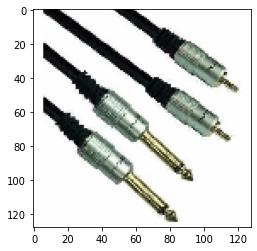

In [9]:
plt.imshow(images[2, :, :, :])

In [10]:
#Categorias
labels.distinct

['MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'MLA1000',
 'ML

In [ ]:
# Esto sirve si vamos a predecir valores binarios

#encoder=OrdinalEncoder()
#encoder.fit(np.array(labels).reshape(-1,1))
#y=encoder.transform(np.array(labels).reshape(-1,1))
#X=images/255. # escalamos para que vaya de 0 a 1

In [11]:
# Si tenemos más de dos posibles valores, nos conviene esto

encoder=OneHotEncoder()
encoder.fit(np.array(labels).reshape(-1,1))
y=encoder.transform(np.array(labels).reshape(-1,1))
X=images/255.

In [12]:
y.todense()

matrix([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]])

In [13]:
# Como ya tengo mis x y mis y borro los labels e images para ahorrar memoria

del labels,images

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train.shape

(4583, 128, 128, 3)

In [16]:
X_test.shape

(2258, 128, 128, 3)

In [17]:
y_train.shape

(4583, 4)

In [18]:
y_test.shape

(2258, 4)

In [19]:
y_test.todense()

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.]])

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
#model.add(layers.Dense(1,activation='sigmoid'))
model.add(layers.Dense(4,activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [ ]:
# esto lo uso si tengo binary
#model.compile(optimizer='adam',
#              loss=tf.keras.losses.BinaryCrossentropy(),
#              metrics=['accuracy'])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [23]:
y_train=y_train.todense()
y_test=y_test.todense()

In [24]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_test,y_test))

Epoch 1/5
144/144 [==============================] - 89s 610ms/step - loss: 1.2225 - accuracy: 0.4318 - val_loss: 1.0370 - val_accuracy: 0.5412
Epoch 2/5
144/144 [==============================] - 88s 608ms/step - loss: 0.9643 - accuracy: 0.5979 - val_loss: 0.9253 - val_accuracy: 0.6209
Epoch 3/5
144/144 [==============================] - 88s 609ms/step - loss: 0.7685 - accuracy: 0.6913 - val_loss: 0.8362 - val_accuracy: 0.6625
Epoch 4/5
144/144 [==============================] - 87s 608ms/step - loss: 0.5616 - accuracy: 0.7807 - val_loss: 0.8039 - val_accuracy: 0.6864
Epoch 5/5
144/144 [==============================] - 88s 611ms/step - loss: 0.3801 - accuracy: 0.8547 - val_loss: 0.9210 - val_accuracy: 0.6820


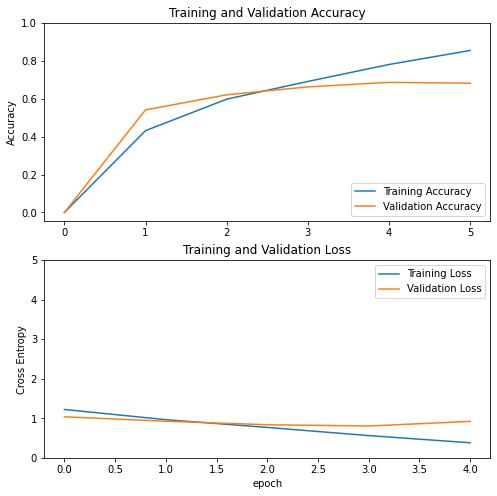

In [25]:
#Grafiquemos los resultados
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,5.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Usamos una red ya entrenada

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import EarlyStopping

new_model = Sequential()
new_model.add(ResNet50(include_top=False, weights='imagenet', pooling='avg'))
new_model.add(tfl.Dense(y_train.shape[1], activation='softmax',trainable=True))
new_model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 8196      
Total params: 23,595,908
Trainable params: 23,542,788
Non-trainable params: 53,120
_________________________________________________________________


In [27]:
#Cargamos un preprocesador del modelo
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [28]:
def modelResnet(image_shape=(128,128)):
    input_shape = image_shape + (3,)
    base_model = tf.keras.applications.ResNet50(input_shape=input_shape,
                                                   include_top=False, # <== Sacamos la última capa
                                                   weights='imagenet') # From imageNet
    
    # Freeze the base model by making it non trainable
    base_model.trainable = False 

    # create the input layer (Same as the imageNetv2 input size)
    inputs = tf.keras.Input(shape=input_shape)
    
    # data preprocessing using the same weights the model was trained on
    x = preprocess_input(inputs) 
    
    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(x, training=False) 
    
    # Add the new Binary classification layers
    # use global avg pooling to summarize the info in each channel
    x = tfl.GlobalAveragePooling2D()(x) 

    x = tfl.Dense(100)(x)
    
    #include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.2)(x)
        
    # create a prediction layer with one neuron (as a classifier only needs one)
    prediction_layer = tfl.Dense(4,activation='softmax')
    
    outputs = prediction_layer(x) 
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [29]:
model2 = modelResnet()

In [30]:
base_learning_rate = 0.01
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [31]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 128, 128, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 128, 128, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               204900    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0     

In [ ]:
new_model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=20, epochs=5, verbose=1)

Epoch 1/5
188/230 [=======================>......] - ETA: 3:37 - loss: 1.7237 - accuracy: 0.3838